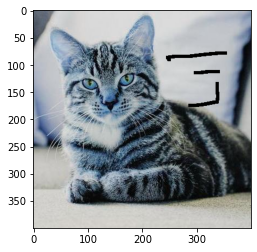

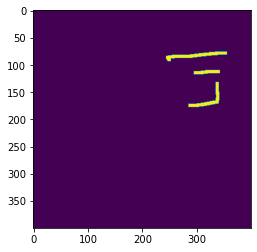

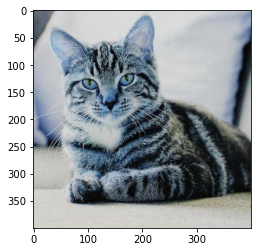

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#open the image
img=cv2.imread('img1.png')
plt.imshow(img)
plt.show()
#load the mask
mask=cv2.imread('img2.png',0)
plt.imshow(mask)
plt.show()
#Inpaint
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)
#Write the output
cv2.imwrite('dimage_inpainted.png',dst)
plt.imshow(dst)
plt.show()

C:\Users\mca\AppData\Local\Temp\ipykernel_11184\3651793001.py:27: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,


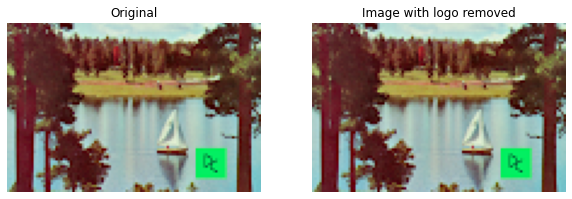

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
plt.rcParams['figure.figsize']=(10,8)
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

image_with_logo=plt.imread('imlogo.png')
#Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])
#Set the pixels where the logo is to 1
mask[210:272,360:425]=1
#Applying inpainting to remove the logo
image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,
                                              mask,
                                              multichannel=True)
# show the original and logo removed images
plot_comparison(image_with_logo,image_logo_removed,'Image with logo removed')

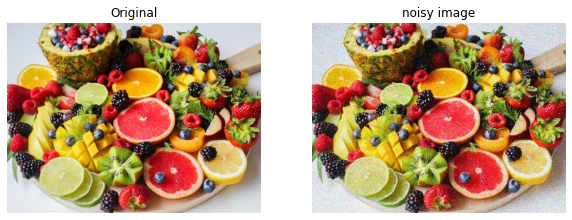

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
from skimage.util import random_noise
plt.rcParams['figure.figsize']=(10,8)
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')


fruit_image=plt.imread('fruitts.jpeg')

noisy_image=random_noise(fruit_image)

plot_comparison(fruit_image,noisy_image,'noisy image')

C:\Users\mca\AppData\Local\Temp\ipykernel_9936\2516239189.py:24: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image=denoise_tv_chambolle(noisy_image,multichannel=True)


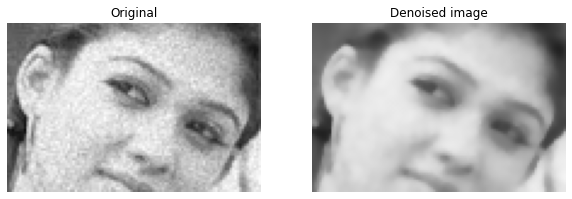

In [7]:
from skimage.restoration import denoise_tv_chambolle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
from skimage.util import random_noise
plt.rcParams['figure.figsize']=(10,8)
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')
noisy_image=plt.imread('noisy.jpg')

denoised_image=denoise_tv_chambolle(noisy_image,multichannel=True)

plot_comparison(noisy_image,denoised_image,'Denoised image')

C:\Users\mca\AppData\Local\Temp\ipykernel_9936\1022075123.py:24: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image=denoise_bilateral(landscape_image,multichannel=True)


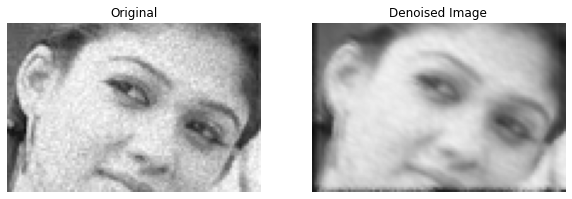

In [8]:

from skimage.restoration import denoise_bilateral
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
from skimage.util import random_noise
plt.rcParams['figure.figsize']=(10,8)
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')
landscape_image=plt.imread('noisy.jpg')

denoised_image=denoise_bilateral(landscape_image,multichannel=True)

plot_comparison(landscape_image,denoised_image,'Denoised Image')

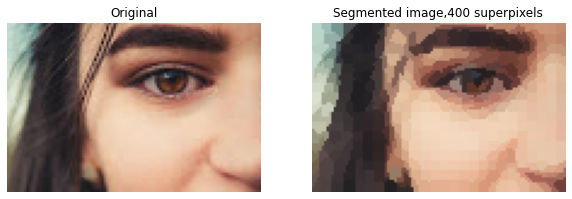

In [9]:
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image=plt.imread('face.jpg')

segments=slic(face_image,n_segments=400)

segmented_image=label2rgb(segments,face_image,kind='avg')

plot_comparison(face_image,segmented_image,'Segmented image,400 superpixels')

In [10]:
def show_image_contour(image,contours):
    plt.figure()
    for n,contour in enumerate(contours):
        plt.plot(contour[:,1],contour[:,0],linewidth=3)
    plt.imshow(image,interpolation='nearest',cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

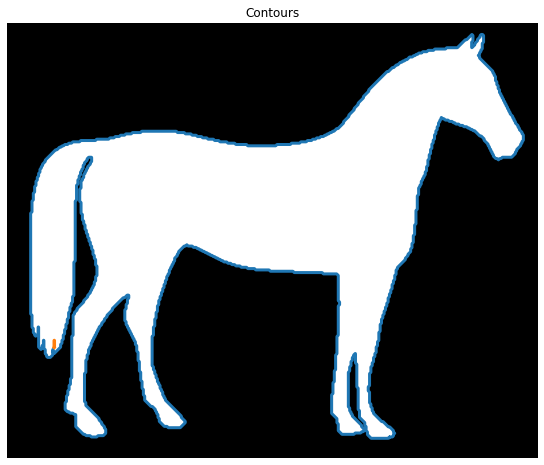

In [11]:
from skimage import measure,data

horse_image=data.horse()

contours=measure.find_contours(horse_image,level=0.8)
show_image_contour(horse_image,contours)

In [12]:
from skimage.io import imread
from skimage.filters import threshold_otsu

image_dices=imread('diceimg.png')

image_dices=color.rgb2gray(image_dices)

thresh=threshold_otsu(image_dices)

binary=image_dices>thresh

contours=measure.find_contours(binary,level=0.8)

show_image_contour(image_dices,contours)

ValueError: the input array must have size 3 along `channel_axis`, got (70, 105, 4)

In [13]:
shape_contours=[cnt.shape[0] for cnt in contours]

max_dots_shape=50

dots_contours=[cnt for cnt in contours if np.shape(cnt)[0]<max_dots_shape]

show_image_contour(binary,contours)

print('Dice dots number:{}.'.format(len(dots_contours)))

NameError: name 'binary' is not defined